In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

These commands configure matplotlib to display plots inline within the notebook and set the display format for floating point numbers in pandas dataframes to show two decimal places. 

In [3]:
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

Reading the CSV Data

In [6]:
flight_data=pd.read_csv("C:/Users/USER/OneDrive/Desktop/flight_data.csv")
flight_data.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,1/1/2013 6:00
5,2013,1,1,554.00,558,-4.00,740.00,728,12.00,UA,1696,N39463,EWR,ORD,150.00,719,5,58,1/1/2013 5:00
6,2013,1,1,555.00,600,-5.00,913.00,854,19.00,B6,507,N516JB,EWR,FLL,158.00,1065,6,0,1/1/2013 6:00
7,2013,1,1,557.00,600,-3.00,709.00,723,-14.00,EV,5708,N829AS,LGA,IAD,53.00,229,6,0,1/1/2013 6:00
8,2013,1,1,557.00,600,-3.00,838.00,846,-8.00,B6,79,N593JB,JFK,MCO,140.00,944,6,0,1/1/2013 6:00
9,2013,1,1,558.00,600,-2.00,753.00,745,8.00,AA,301,N3ALAA,LGA,ORD,138.00,733,6,0,1/1/2013 6:00


In [7]:
df_summary = flight_data.describe()
df_summary

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.00,336776.00,336776.00,328521.00,336776.00,328521.00,328063.00,336776.00,327346.00,336776.00,327346.00,336776.00,336776.00,336776.00
mean,2013.00,6.55,15.71,1349.11,1344.25,12.64,1502.05,1536.38,6.90,1971.92,150.69,1039.91,13.18,26.23
std,0.00,3.41,8.77,488.28,467.34,40.21,533.26,497.46,44.63,1632.47,93.69,733.23,4.66,19.30
min,2013.00,1.00,1.00,1.00,106.00,-43.00,1.00,1.00,-86.00,1.00,20.00,17.00,1.00,0.00
25%,2013.00,4.00,8.00,907.00,906.00,-5.00,1104.00,1124.00,-17.00,553.00,82.00,502.00,9.00,8.00
50%,2013.00,7.00,16.00,1401.00,1359.00,-2.00,1535.00,1556.00,-5.00,1496.00,129.00,872.00,13.00,29.00
75%,2013.00,10.00,23.00,1744.00,1729.00,11.00,1940.00,1945.00,14.00,3465.00,192.00,1389.00,17.00,44.00
max,2013.00,12.00,31.00,2400.00,2359.00,1301.00,2400.00,2359.00,1272.00,8500.00,695.00,4983.00,23.00,59.00


In [10]:
# 1. Date
flight_data['DATE'] = pd.to_datetime(flight_data[['year','month','day']], yearfirst=True)

In [12]:
month_dict={
    1:  '01- January',
    2:  '02- February',
    3:  '03- March',
    4:  '04- April',
    5:  '05- May',
    6:  '06- June',
    7:  '07- July',
    8:  '08- August',
    9:  '09- September',
    10: '10- October',
    11: '11- November',
    12: '12- December'
}

In [14]:
flight_data['MONTH_desc'] = flight_data['month'].apply(lambda m: month_dict[m])
flight_data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,DATE,MONTH_desc
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,...,N14228,EWR,IAH,227.00,1400,5,15,1/1/2013 5:00,2013-01-01,01- January
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,...,N24211,LGA,IAH,227.00,1416,5,29,1/1/2013 5:00,2013-01-01,01- January
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,...,N619AA,JFK,MIA,160.00,1089,5,40,1/1/2013 5:00,2013-01-01,01- January
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,...,N804JB,JFK,BQN,183.00,1576,5,45,1/1/2013 5:00,2013-01-01,01- January
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,...,N668DN,LGA,ATL,116.00,762,6,0,1/1/2013 6:00,2013-01-01,01- January


In [15]:
rows,cols = flight_data.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  336776
Number of columns:  21


In [16]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year            336776 non-null  int64         
 1   month           336776 non-null  int64         
 2   day             336776 non-null  int64         
 3   dep_time        328521 non-null  float64       
 4   sched_dep_time  336776 non-null  int64         
 5   dep_delay       328521 non-null  float64       
 6   arr_time        328063 non-null  float64       
 7   sched_arr_time  336776 non-null  int64         
 8   arr_delay       327346 non-null  float64       
 9   carrier         336776 non-null  object        
 10  flight          336776 non-null  int64         
 11  tailnum         334264 non-null  object        
 12  origin          336776 non-null  object        
 13  dest            336776 non-null  object        
 14  air_time        327346 non-null  flo

In [18]:
flt_data_new= flight_data.dropna()
flt_data_new.head()
flt_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year            327346 non-null  int64         
 1   month           327346 non-null  int64         
 2   day             327346 non-null  int64         
 3   dep_time        327346 non-null  float64       
 4   sched_dep_time  327346 non-null  int64         
 5   dep_delay       327346 non-null  float64       
 6   arr_time        327346 non-null  float64       
 7   sched_arr_time  327346 non-null  int64         
 8   arr_delay       327346 non-null  float64       
 9   carrier         327346 non-null  object        
 10  flight          327346 non-null  int64         
 11  tailnum         327346 non-null  object        
 12  origin          327346 non-null  object        
 13  dest            327346 non-null  object        
 14  air_time        327346 non-null  flo

In [19]:
# Number of scheduled departures planned by carriers in 2013

carrier_count = flight_data['carrier'].value_counts()
carrier_count

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

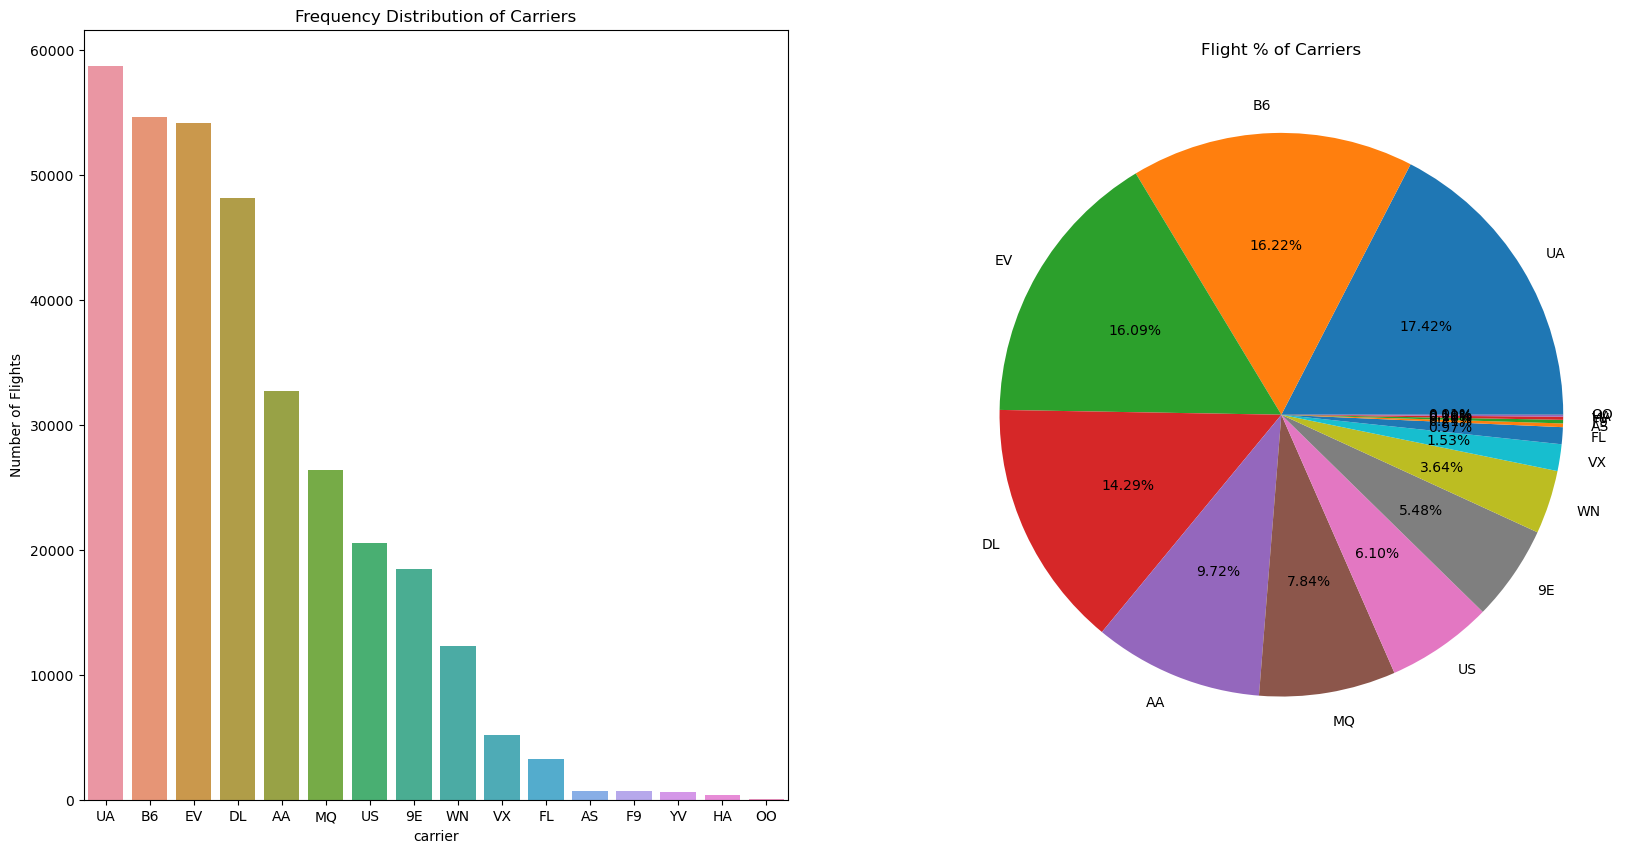

In [20]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the percentage distribution of carriers using a pie chart
flight_data['carrier'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[1], shadow=False)
ax[1].set_title('Flight % of Carriers')
ax[1].set_ylabel('')

# Plot the frequency distribution of carriers using a bar plot
sns.countplot(x='carrier', order=flight_data['carrier'].value_counts().index, data=flight_data, ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_ylabel('Number of Flights')

# Show the plot
plt.show()
     

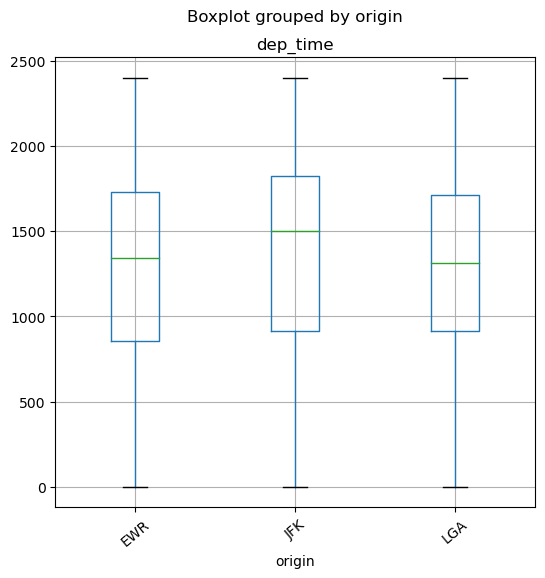

In [22]:
#1 Overall pattern of departure time from NYC airports

flt_data_new.boxplot('dep_time','origin', rot = 40, figsize=(6,6))

plt.show()



In [24]:
# Number of destinations

destfromNYC=flt_data_new['dest'].unique() # Unique destinations
destcountfromNYC=len(destfromNYC)         # Number of unique destinations
print("The total number of destination flight from NYC is" ,destcountfromNYC)
print('\n')

The total number of destination flight from NYC is 104




In [32]:
# Number of Scheduled Departure from each origin

origincount = flt_data_new['origin'].value_counts()

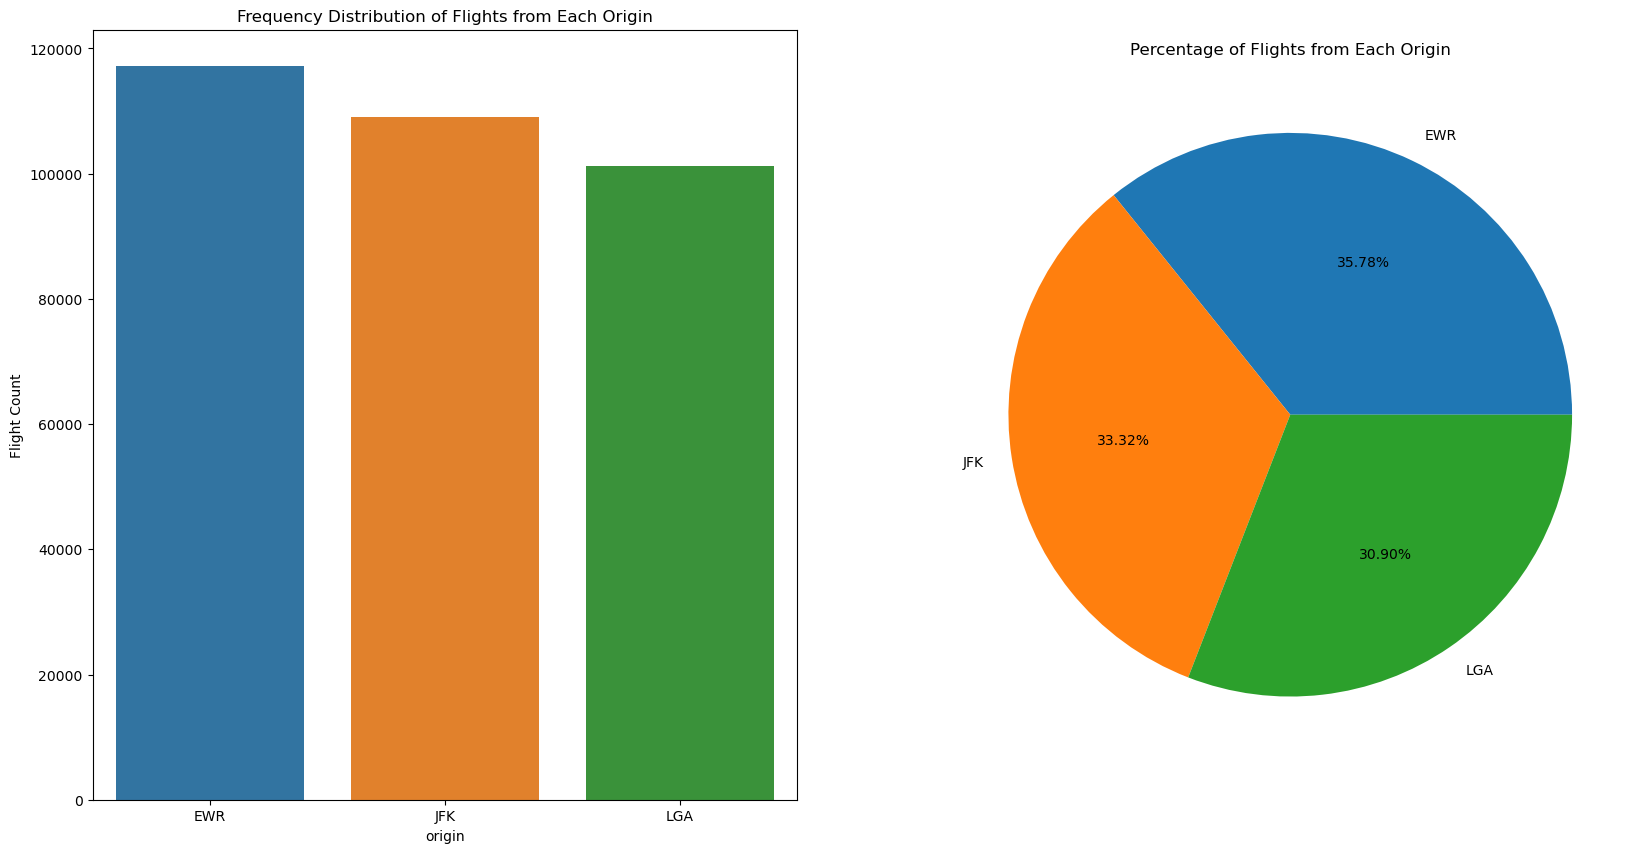

In [33]:
# Figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the frequency distribution of flights from each origin using a bar plot
sns.countplot(x='origin', order=origincount.index, data=flt_data_new, ax=ax[0])
ax[0].set_title('Frequency Distribution of Flights from Each Origin')
ax[0].set_ylabel('Flight Count')

# Plot the percentage distribution of flights from each origin using a pie chart
flt_data_new['origin'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[1], shadow=False)
ax[1].set_title('Percentage of Flights from Each Origin')
ax[1].set_ylabel('')

# Show the plot
plt.show()

In [37]:
# Number of scheduled arrival at unique destination

Destination= flight_data['dest'].value_counts().sort_values(ascending=False).head(50)
Destination

ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
CLT    14064
SFO    13331
FLL    12055
MIA    11728
DCA     9705
DTW     9384
DFW     8738
RDU     8163
TPA     7466
DEN     7266
IAH     7198
MSP     7185
PBI     6554
BNA     6333
LAS     5997
SJU     5819
IAD     5700
BUF     4681
PHX     4656
CLE     4573
STL     4339
MDW     4113
CVG     3941
SEA     3923
MSY     3799
RSW     3537
CMH     3524
CHS     2884
PIT     2875
MKE     2802
SAN     2737
JAX     2720
BTV     2589
SLC     2467
RIC     2454
AUS     2439
ROC     2416
PWM     2352
HOU     2115
IND     2077
MCI     2008
MEM     1789
BWI     1781
SYR     1761
PHL     1632
Name: dest, dtype: int64

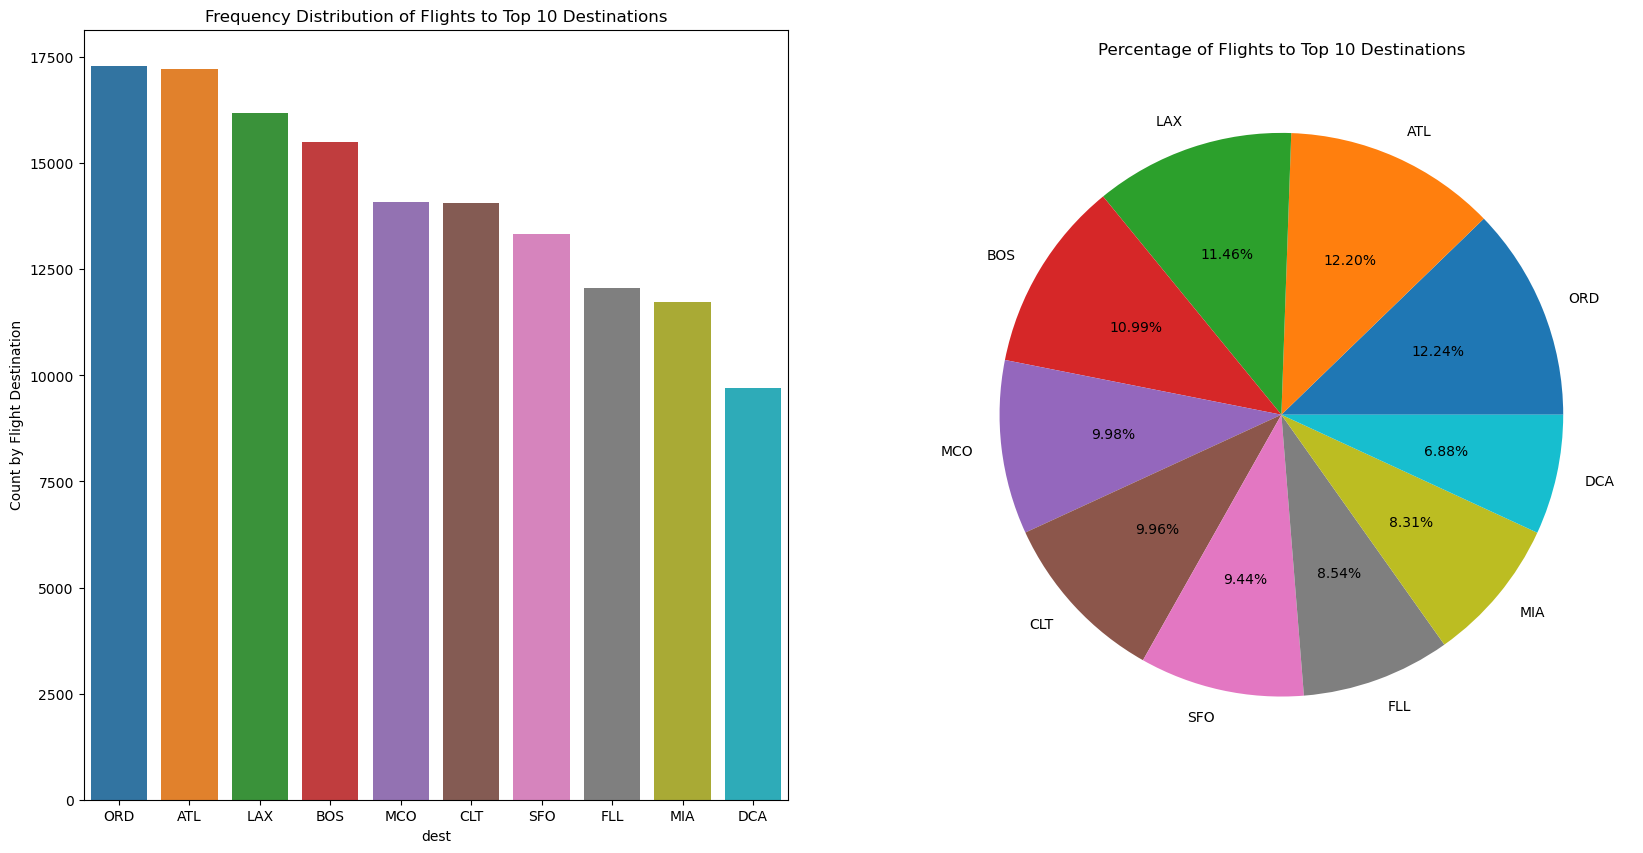

In [38]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the percentage distribution of flights to the top 10 destinations using a pie chart
flight_data['dest'].value_counts().head(10).plot.pie(autopct='%1.2f%%', ax=ax[1], shadow=False)
ax[1].set_title('Percentage of Flights to Top 10 Destinations')
ax[1].set_ylabel('')

# Plot the frequency distribution of flights to the top 10 destinations using a bar plot
sns.countplot(x='dest', order=flight_data['dest'].value_counts().head(10).index, data=flight_data, ax=ax[0])
ax[0].set_title('Frequency Distribution of Flights to Top 10 Destinations')
ax[0].set_ylabel('Count by Flight Destination')

# Show the plot
plt.show()

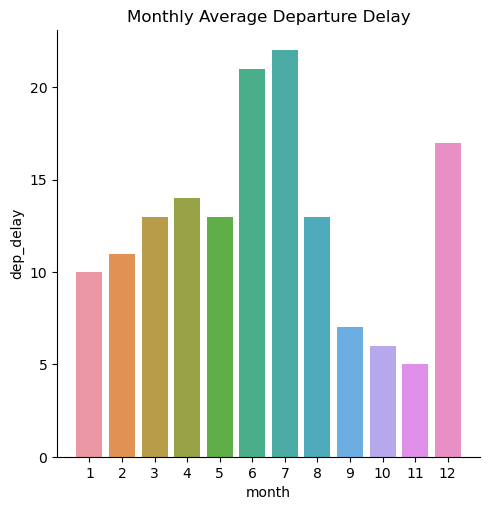

In [39]:
# Monthly Average Departure Departure Delay

monthly_delay = flight_data.groupby(['month'], as_index=False).agg({'dep_delay': 'mean'})
monthly_delay['dep_delay']=np.round(monthly_delay['dep_delay'],0)
sns.catplot(x='month', y='dep_delay',data=monthly_delay, kind='bar')
plt.title("Monthly Average Departure Delay")
plt.plot()
plt.show()

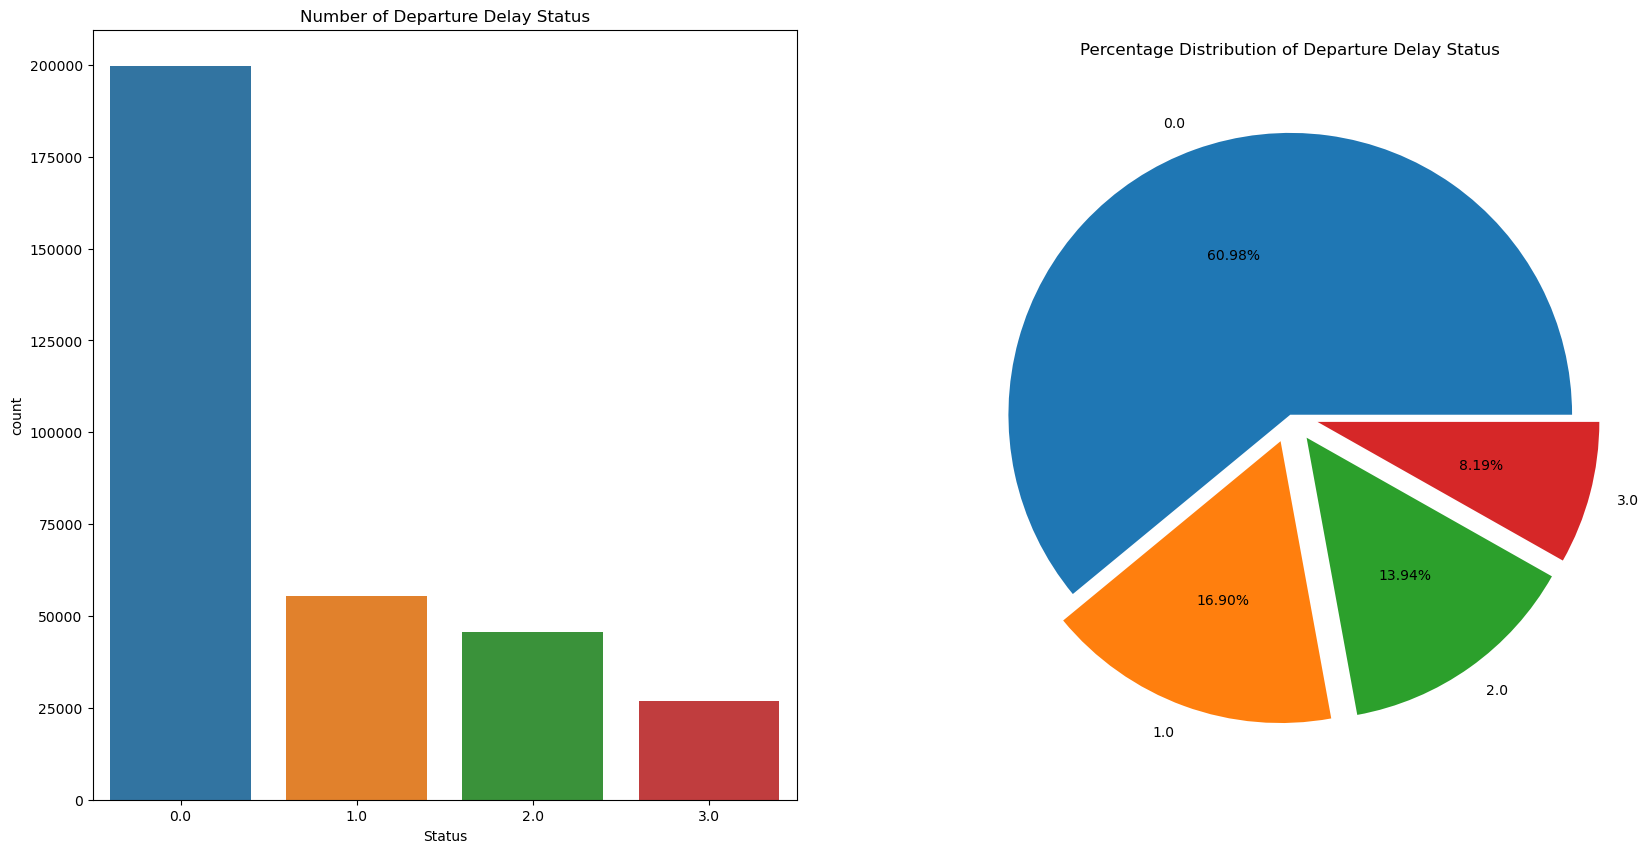

In [44]:
# Classify departure delays into different status categories
flt_data_new.loc[flt_data_new['dep_delay'] <= 0, 'Status'] = 0
flt_data_new.loc[(flt_data_new['dep_delay'] > 0) & (flt_data_new['dep_delay'] < 15), 'Status'] = 1
flt_data_new.loc[(flt_data_new['dep_delay'] >= 15) & (flt_data_new['dep_delay'] < 60), 'Status'] = 2
flt_data_new.loc[flt_data_new['dep_delay'] >= 60, 'Status'] = 3

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the percentage distribution of departure delay status using a pie chart
flt_data_new['Status'].value_counts().plot.pie(explode=[0, 0.1, 0.1, 0.1], autopct='%1.2f%%', ax=ax[1], shadow=False)
ax[1].set_title('Percentage Distribution of Departure Delay Status')
ax[1].set_ylabel('')

# Plot the count of departure delay status using a bar plot
sns.countplot(x='Status', data=flt_data_new, order=flt_data_new['Status'].value_counts().index, ax=ax[0])
ax[0].set_title('Number of Departure Delay Status')

# Show the plot
plt.show()
     

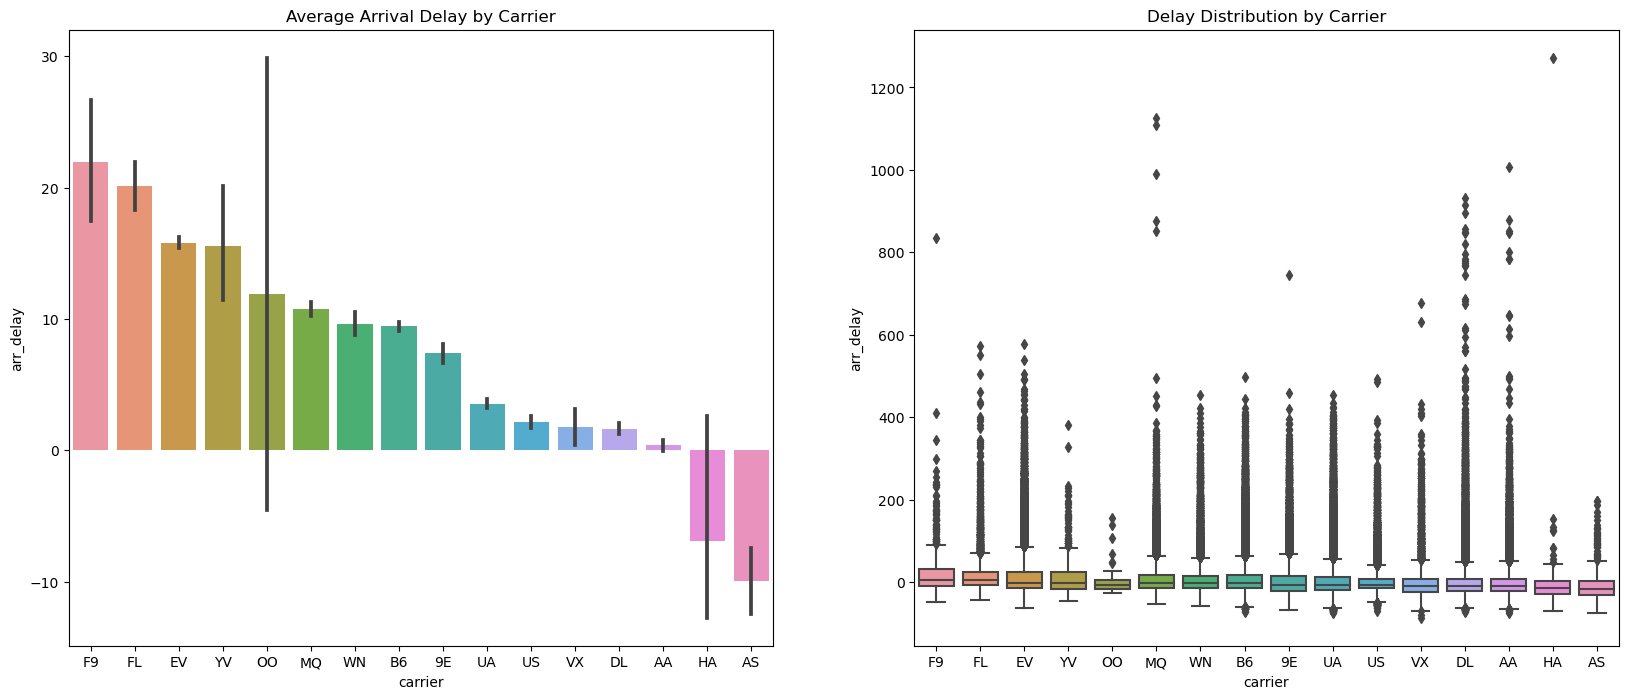

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'US: US Airways', 'YV: Mesa Airlines', 'HA: Hawaiian Airlines', 'EV: Atlantic Southeast Airlines', 'FL: AirTran Airways', 'F9: Frontier Airlines', 'VX: Virgin America', 'B6: JetBlue Airways', '9E: Pinnacle Airlines', 'AS: Alaska Airlines']


In [48]:


# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot the average arrival delay by carrier using a bar plot
sns.barplot(x='carrier', y='arr_delay', data=flt_data_new, ax=ax[0], order=['F9', 'FL', 'EV', 'YV', 'OO', 'MQ', 'WN', 'B6', '9E', 'UA', 'US', 'VX', 'DL', 'AA', 'HA', 'AS'])
ax[0].set_title('Average Arrival Delay by Carrier')

# Plot the delay distribution by carrier using a box plot
sns.boxplot(x='carrier', y='arr_delay', data=flt_data_new, ax=ax[1], order=['F9', 'FL', 'EV', 'YV', 'OO', 'MQ', 'WN', 'B6', '9E', 'UA', 'US', 'VX', 'DL', 'AA', 'HA', 'AS'])
ax[1].set_title('Delay Distribution by Carrier')

# Close the unnecessary second boxplot figure
plt.close(2)

# Show the plot
plt.show()

# Print the carrier codes and corresponding airline names
print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','US: US Airways','YV: Mesa Airlines', 'HA: Hawaiian Airlines',
       'EV: Atlantic Southeast Airlines','FL: AirTran Airways','F9: Frontier Airlines','VX: Virgin America',
       'B6: JetBlue Airways','9E: Pinnacle Airlines','AS: Alaska Airlines'])

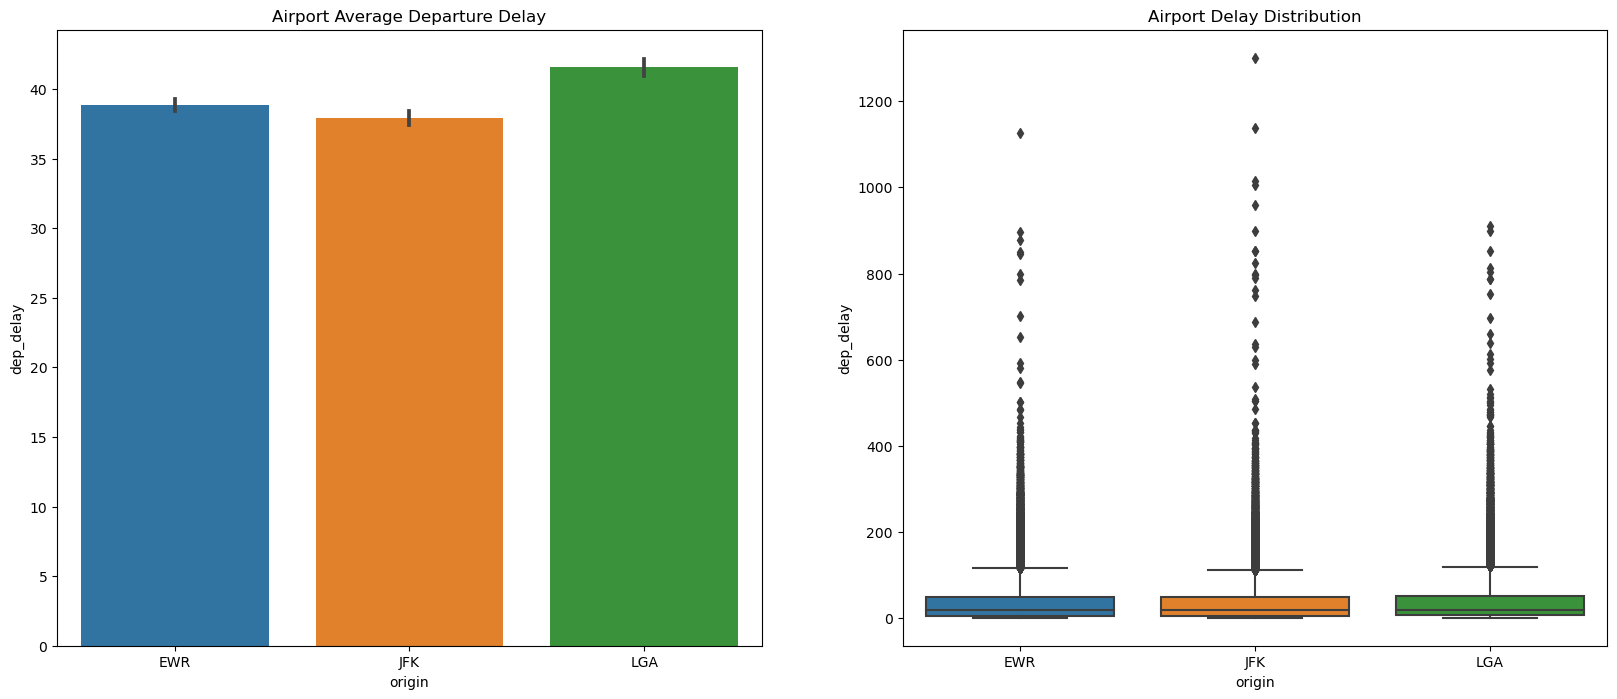

There seems to be a correlation between the number of flights operated and departure delay. A descending pattern can be seen from the bar plot for average departure delay per flight. Considering the assumption that JFK is the busiest airport among the three due to international flights, the maximum departure delay for 2013 is registered by JFK.


In [49]:
Delayedflights = flt_data_new[(flt_data_new.Status >= 1) &(flt_data_new.Status <= 3)]

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot the average departure delay by airport using a bar plot
sns.barplot(x='origin', y='dep_delay', data=Delayedflights, order=['EWR', 'JFK', 'LGA'], ax=ax[0])
ax[0].set_title('Airport Average Departure Delay')

# Plot the departure delay distribution by airport using a box plot
sns.boxplot(x='origin', y='dep_delay', data=Delayedflights, order=['EWR', 'JFK', 'LGA'], ax=ax[1])
ax[1].set_title('Airport Delay Distribution')

# Show the plot
plt.show()

print('There seems to be a correlation between the number of flights operated and departure delay. A descending pattern can be seen from the bar plot for average departure delay per flight. Considering the assumption that JFK is the busiest airport among the three due to international flights, the maximum departure delay for 2013 is registered by JFK.')
     

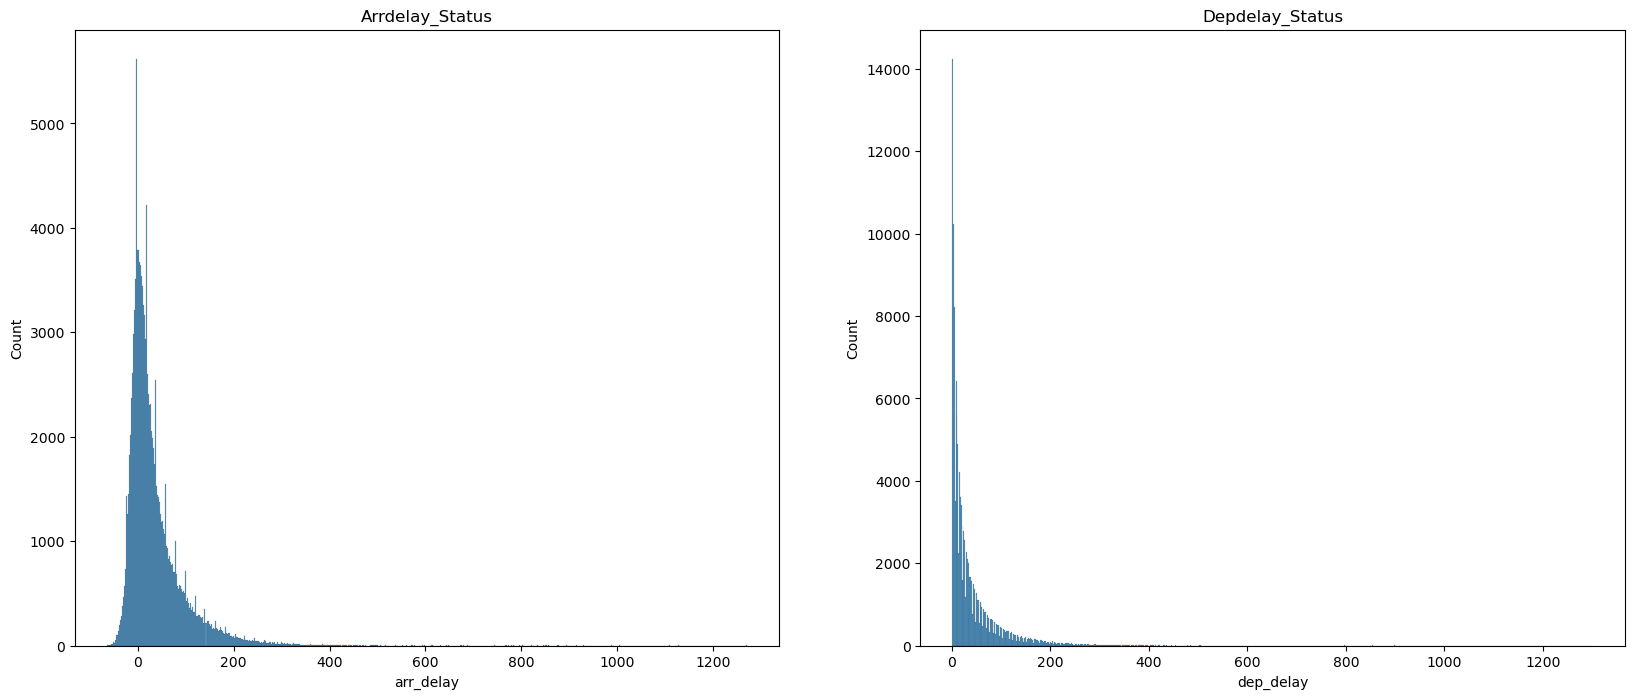

Skewness_arr: 2.850876
Kurtosis_arr: 18.292532
Skewness_dep: 3.458588
Kurtosis_dep: 25.034700


It can be seen on the histogram and by the skewness and kurtosis indexes, that the skewness is >1 which reflect the data distribution is highly positively skewed and Kurtosis>3 shows the leptokurtic distribution, having longer and fatter tail with a central peak higher and sharper.


The histogram shows the delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time.


In [52]:

# histogram for arrival and departure delay

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.histplot(Delayedflights['arr_delay'], ax=ax[0])

ax[0].set_title('Arrdelay_Status')

sns.histplot(Delayedflights['dep_delay'], ax=ax[1])
ax[1].set_title('Depdelay_Status')
plt.show()

print("Skewness_arr: %f" % Delayedflights['arr_delay'].skew())
print("Kurtosis_arr: %f" % Delayedflights['arr_delay'].kurt())
print("Skewness_dep: %f" % Delayedflights['dep_delay'].skew())
print("Kurtosis_dep: %f" % Delayedflights['dep_delay'].kurt())
print('\n')
print('It can be seen on the histogram and by the skewness and kurtosis indexes, that the skewness is >1 which reflect the data distribution is highly positively skewed and Kurtosis>3 shows the leptokurtic distribution, having longer and fatter tail with a central peak higher and sharper.')
print('\n')
print('The histogram shows the delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time.')

Top 5 destinations where flights arrive earlier than expected arrival time:
ATL    10794
ORD    10265
BOS    10213
LAX     9571
CLT     9404
Name: dest, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_10508\2106779358.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5flight_details['arr_delay'] = pd.to_numeric(top5flight_details['arr_delay'], errors='coerce')


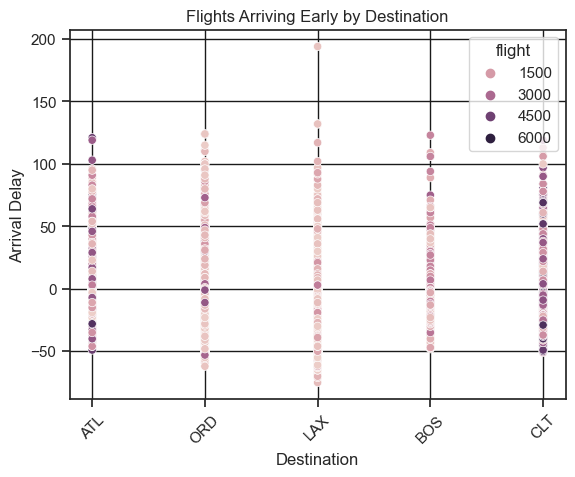

In [53]:
Ontime_Early_flights = flt_data_new[flt_data_new['Status'] <= 0]
top5destinations = Ontime_Early_flights['dest'].value_counts().head(5)

print("Top 5 destinations where flights arrive earlier than expected arrival time:")
print(top5destinations)

top5flight_details = Ontime_Early_flights[Ontime_Early_flights['dest'].isin(top5destinations.index)]
top5flight_details['arr_delay'] = pd.to_numeric(top5flight_details['arr_delay'], errors='coerce')

# Filter out rows with non-numeric values in 'arr_delay' column
top5flight_details = top5flight_details[~top5flight_details['arr_delay'].isnull()]

sns.set(style='ticks')

sns.scatterplot(x='dest', y='arr_delay', data=top5flight_details, hue='flight')

plt.grid(True, color='k')
plt.title('Flights Arriving Early by Destination')
plt.xlabel('Destination')
plt.ylabel('Arrival Delay')
plt.xticks(rotation=45)

plt.show()

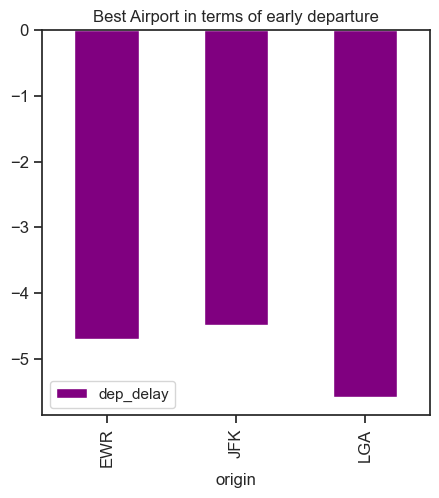

In [54]:
# Best airport in terms of early departure from NYC

airport_info = pd.DataFrame(flt_data_new,columns=['day','month','dep_delay','arr_delay','carrier','origin','dest','flight'])
airport_origin = airport_info[airport_info['dep_delay']<0]
best_airport = airport_origin.sort_values(['dep_delay']).groupby(['origin']).agg({'dep_delay':'mean'})
best_airport.plot(kind='bar',color='purple', title ="Best Airport in terms of early departure",figsize=(5,5),legend=True, fontsize=12)
plt.show()
plt.close()

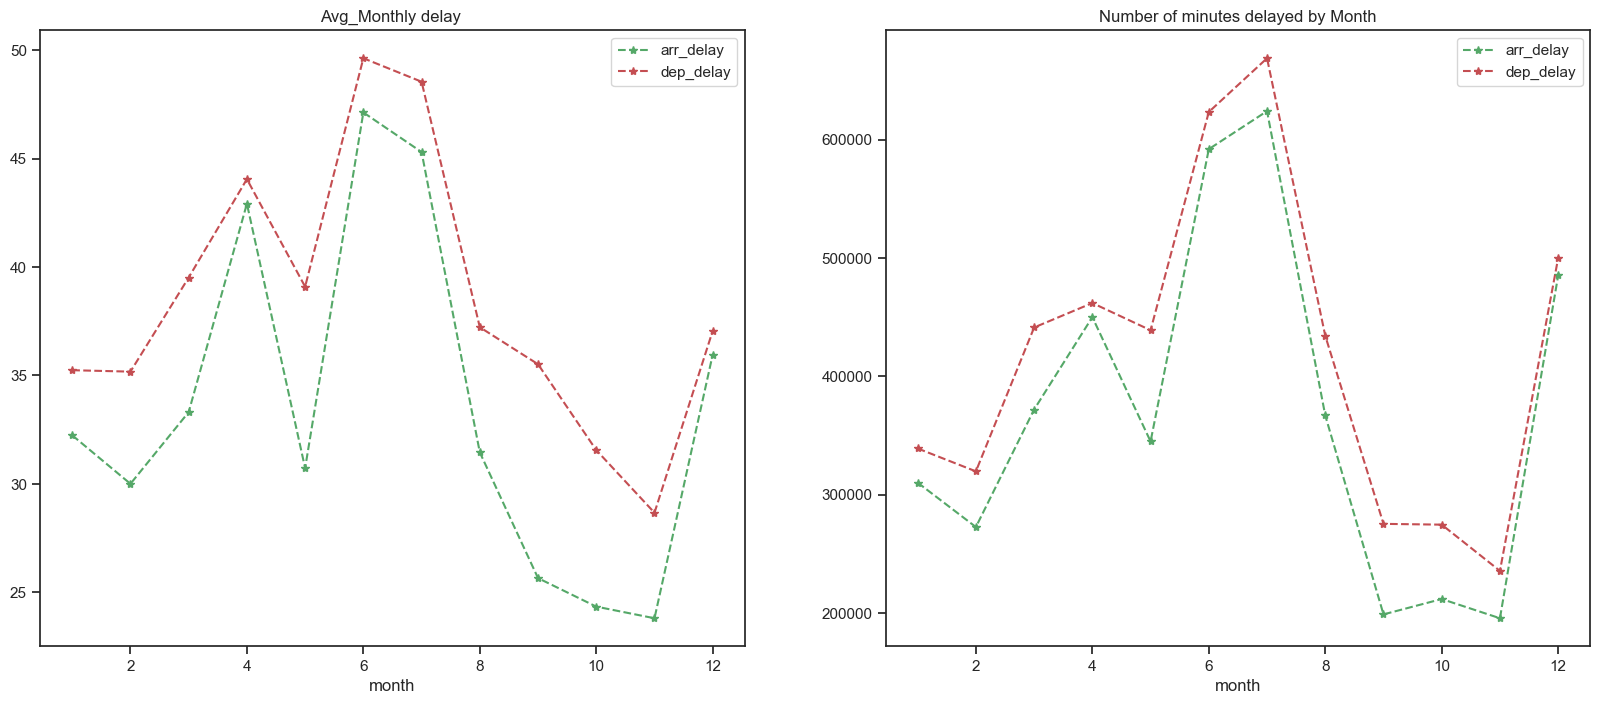

In [55]:
# Line Graph for Avg_Monthly delay of a/c  and Number of minutes delayed by month (excluding staus 0)
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['month','arr_delay','dep_delay']].groupby(['month']).mean().plot(ax=ax[0],marker='*', linestyle='dashed',color ='g'+'r')
ax[0].set_title('Avg_Monthly delay ')
Delayedflights[['month','arr_delay','dep_delay']].groupby(['month']).sum().plot(ax=ax[1], marker='*', linestyle='dashed',color ='g'+'r')
ax[1].set_title('Number of minutes delayed by Month')
plt.show()

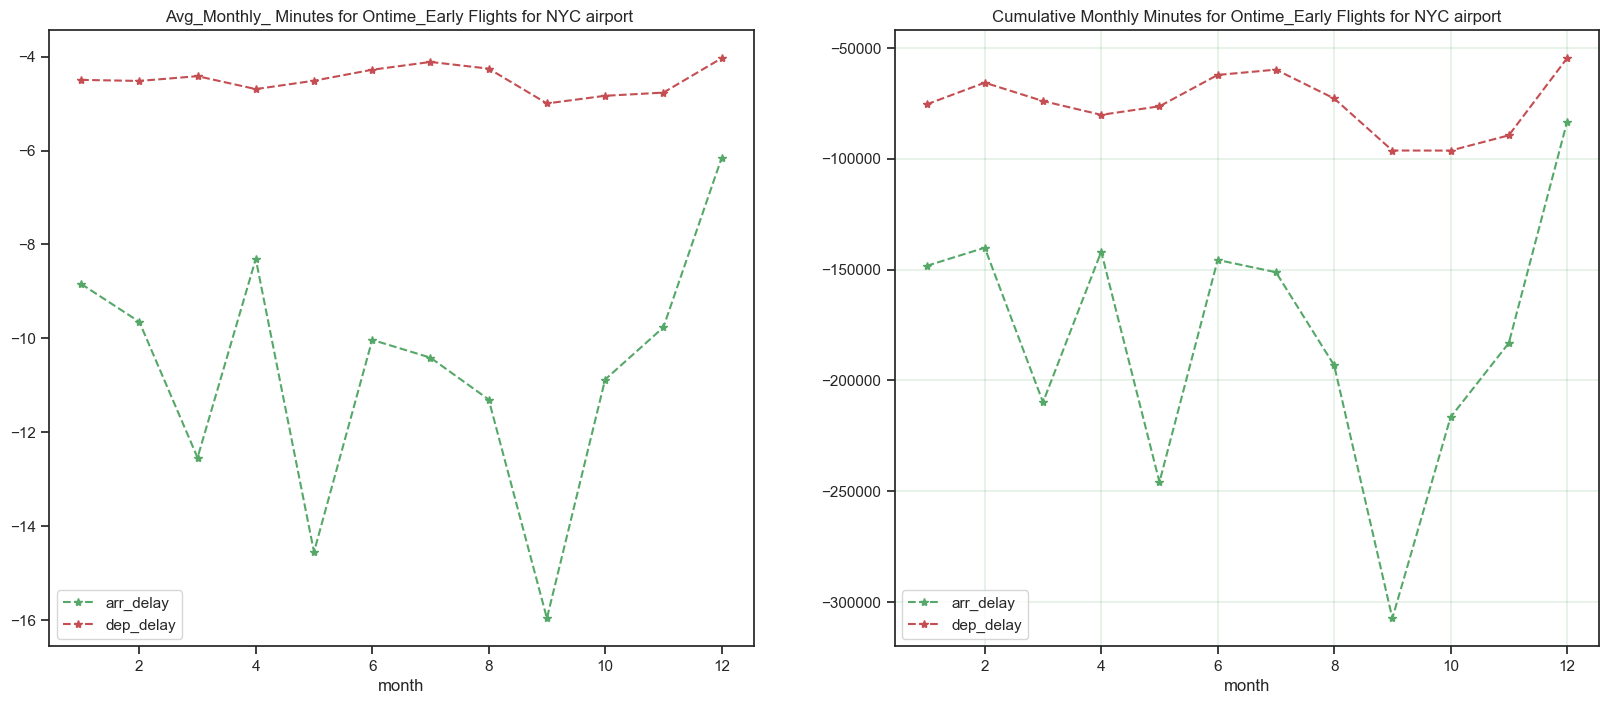

In [56]:
# Monthly_Delays of Ontime_Early_ Flights (only for status 0)

f,ax=plt.subplots(1,2,figsize=(20,8))
Ontime_Early_flights[['month','arr_delay','dep_delay']].groupby(['month']).mean().plot(ax=ax[0],marker='*', linestyle='dashed',color ='g'+'r')
ax[0].set_title('Avg_Monthly_ Minutes for Ontime_Early Flights for NYC airport ')


Ontime_Early_flights[['month','arr_delay','dep_delay']].groupby(['month']).sum().plot(ax=ax[1], marker='*', linestyle='dashed',color ='g'+'r')
ax[1].set_title('Cumulative Monthly Minutes for Ontime_Early Flights for NYC airport')
plt.grid(True, color='g',linewidth='0.2')
plt.show()